# Diseño Completamente al Azar (DCA)

## Resumen General

El **Diseño Completamente al Azar (DCA)** se emplea cuando las unidades experimentales son homogéneas y pueden ser asignadas aleatoriamente a tratamientos sin necesidad de bloques. Se aplica frecuentemente en condiciones controladas, como laboratorios.

## Modelo Estadístico

El modelo estadístico para el DCA es:

$$
Y_{ij} = \mu + \tau_i + \epsilon_{ij}
$$

- $Y_{ij}$: Respuesta observada para el tratamiento $i$ en la repetición $j$
- $\mu$: Media general
- $\tau_i$: Efecto del tratamiento $i$
- $\epsilon_{ij}$: Error aleatorio, con $E(\epsilon_{ij}) = 0$, $Var(\epsilon_{ij}) = \sigma^2$

## Hipótesis

- **$H_0$**: $\tau_1 = \tau_2 = \dots = \tau_t$ (todos los tratamientos tienen el mismo efecto)
- **$H_a$**: Al menos uno de los $\tau_i$ es distinto

## Supuestos del Modelo

| **SUPUESTO**                  | **PRUEBA**                          | **REGLA DE DECISIÓN**                                      |
|------------------------------|-------------------------------------|-------------------------------------------------------------|
| Normalidad de residuos       | Shapiro-Wilk / Kolmogorov-Smirnov  | $p > \alpha \Rightarrow$ residuos normales                 |
| Homogeneidad de varianzas    | Levene                              | $p > \alpha \Rightarrow$ varianzas homogéneas              |
| Independencia de residuos    | Durbin-Watson                       | Estadístico $DW \approx 2 \Rightarrow$ residuos independientes |

## ANOVA

\[
\begin{array}{|c|c|c|c|c|}
\hline
\textbf{Fuente} & \textbf{GL} & \textbf{Suma de Cuadrados (SC)} & \textbf{Cuadrado Medio (CM)} & \textbf{F} \\
\hline
\text{Tratamientos} & t - 1 & SC_{\text{trat}} = \sum_{i=1}^t \frac{Y_{i.}^2}{r_i} - \frac{Y_{..}^2}{N} & CM_{\text{trat}} = \frac{SC_{\text{trat}}}{t - 1} & F = \frac{CM_{\text{trat}}}{CM_{\text{error}}} \\
\hline
\text{Error} & \sum r_i - t & SC_{\text{error}} = SC_{\text{total}} - SC_{\text{trat}} & CM_{\text{error}} = \frac{SC_{\text{error}}}{GL_{\text{error}}} & \\
\hline
\text{Total} & N - 1 & SC_{\text{total}} = \sum_{i=1}^t \sum_{j=1}^{r_i} Y_{ij}^2 - \frac{Y_{..}^2}{N} & & \\
\hline
\end{array}
\]

Donde:

- $t$: número de tratamientos
- $r_i$: número de repeticiones por tratamiento $i$
- $Y_{i.}$: suma total del tratamiento $i$
- $Y_{..}$: suma total de todos los tratamientos
- $N$: total de observaciones

## Regla de Decisión

- Si $F_{\text{calc}} > F_{\text{tab}}$, entonces **rechazar** $H_0$
- Equivalente: Si $p$-valor $< \alpha$, entonces **rechazar** $H_0$

## Pruebas Post-hoc (Comparaciones Múltiples)

### 1. LSD de Fisher (Diseño balanceado)

$$
LSD = t_{\alpha/2, \, GL_{\text{error}}} \cdot \sqrt{MSE \left( \frac{1}{n_i} + \frac{1}{n_j} \right)}
$$

### 2. Tukey

$$
HSD = q_{\alpha}(k, \, GL_{\text{error}}) \cdot \sqrt{\frac{MSE}{n}}
$$

### 3. Scheffé

$$
S = \sqrt{(k - 1) \cdot F_{\alpha}(k - 1, GL_{\text{error}}) \cdot \frac{MSE}{n}}
$$


CODIGO EN PYTHON 

ANALISIS DEL EXPERIMENTO

In [79]:
# Ingresar los datos del experimento
factor = "Crecimeinto de la planta"
niveles = ["tratamientos"]
tratamientos_inp = ["T_1","T_2","T_3","T_4"]
unidad_experimental = "Planta Pinus Radiata"
variable_respuesta = "Tamaño en Metros" 

# Mostrar resumen
print("\nResumen del Experimento:")
print(f"Factor: {factor}")
print(f"Niveles del factor: {niveles}")
print(f"Tratamientos: {tratamientos_inp}")
print(f"Unidad experimental: {unidad_experimental}")
print(f"Variable de respuesta: {variable_respuesta}")


# Almacenar en un diccionario para usarlo después
experimento = {
    "factor": factor,
    "niveles": niveles,
    "tratamientos": tratamientos_inp,
    "unidad_experimental": unidad_experimental,
    "variable_respuesta": variable_respuesta
}




Resumen del Experimento:
Factor: Crecimeinto de la planta
Niveles del factor: ['tratamientos']
Tratamientos: ['T_1', 'T_2', 'T_3', 'T_4']
Unidad experimental: Planta Pinus Radiata
Variable de respuesta: Tamaño en Metros


Paso 1 : Importar librerías

In [80]:

# Librerias
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import shapiro
from scipy.stats import levene
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt
from statsmodels.graphics.regressionplots import influence_plot
import seaborn as sns
import numpy as np
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.api import anova_lm
from scipy.stats import f
from scipy.stats import kstest
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.libqsturng import psturng, qsturng
from statsmodels.stats.multicomp import pairwise_tukeyhsd



Paso 2 : Insertar lo datos con los que se va a trabajar

In [81]:
#crear DataFrame
# Datos del ejemplo (tratamiento vs resistencia)
df = pd.DataFrame({
    'Tratamiento': ['T1']*12 + ['T2']*12+ ['T3']*12 + ['T4']*12 ,
    'Factor': [1.10,1.11,1.05,1.12,1.25,1.20,1.07,1.08,1.09,1.10,1.11,1.12,1.02,1.15,0.96,0.99,0.94,0.76,1.25,1.07,0.95,1.05,1.22,1.03,0.93,0.72,0.68,0.75,0.63,0.88,0.82,0.77,0.58,0.74,0.84,0.73,0.84,0.80,0.68,0.96,0.76,0.91,0.91,0.82,0.78,0.85,0.79,0.87]
})
print(df.head())


  Tratamiento  Factor
0          T1    1.10
1          T1    1.11
2          T1    1.05
3          T1    1.12
4          T1    1.25


Paso 3 :  Primer vistazo de la tabla ANOVA

In [82]:
modelo = ols('Factor ~ C(Tratamiento)', data=df).fit()
anova_table = sm.stats.anova_lm(modelo, typ=2)
print(anova_table)

                  sum_sq    df          F        PR(>F)
C(Tratamiento)  1.025473   3.0  37.129592  4.046506e-12
Residual        0.405075  44.0        NaN           NaN


Paso 4 : Extraccion de resiudos 


Primeros residuos:
[[-0.01666667]
 [-0.00666667]
 [-0.06666667]
 [ 0.00333333]
 [ 0.13333333]
 [ 0.08333333]
 [-0.04666667]
 [-0.03666667]
 [-0.02666667]
 [-0.01666667]
 [-0.00666667]
 [ 0.00333333]
 [-0.0125    ]
 [ 0.1175    ]
 [-0.0725    ]
 [-0.0425    ]
 [-0.0925    ]
 [-0.2725    ]
 [ 0.2175    ]
 [ 0.0375    ]
 [-0.0825    ]
 [ 0.0175    ]
 [ 0.1875    ]
 [-0.0025    ]
 [ 0.17416667]
 [-0.03583333]
 [-0.07583333]
 [-0.00583333]
 [-0.12583333]
 [ 0.12416667]
 [ 0.06416667]
 [ 0.01416667]
 [-0.17583333]
 [-0.01583333]
 [ 0.08416667]
 [-0.02583333]
 [ 0.00916667]
 [-0.03083333]
 [-0.15083333]
 [ 0.12916667]
 [-0.07083333]
 [ 0.07916667]
 [ 0.07916667]
 [-0.01083333]
 [-0.05083333]
 [ 0.01916667]
 [-0.04083333]
 [ 0.03916667]]


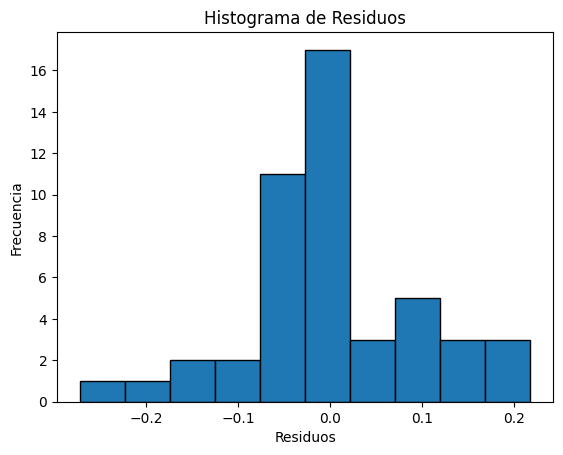

In [83]:
# Extracción de los residuales
residuos = modelo.resid
print("\nPrimeros residuos:")
print(residuos.values.reshape(-1, 1))

# Histograma de los residuos
plt.hist(residuos, bins=10, edgecolor='black')
plt.title('Histograma de Residuos')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.show()


Paso 5 : Graficos de diagnostico

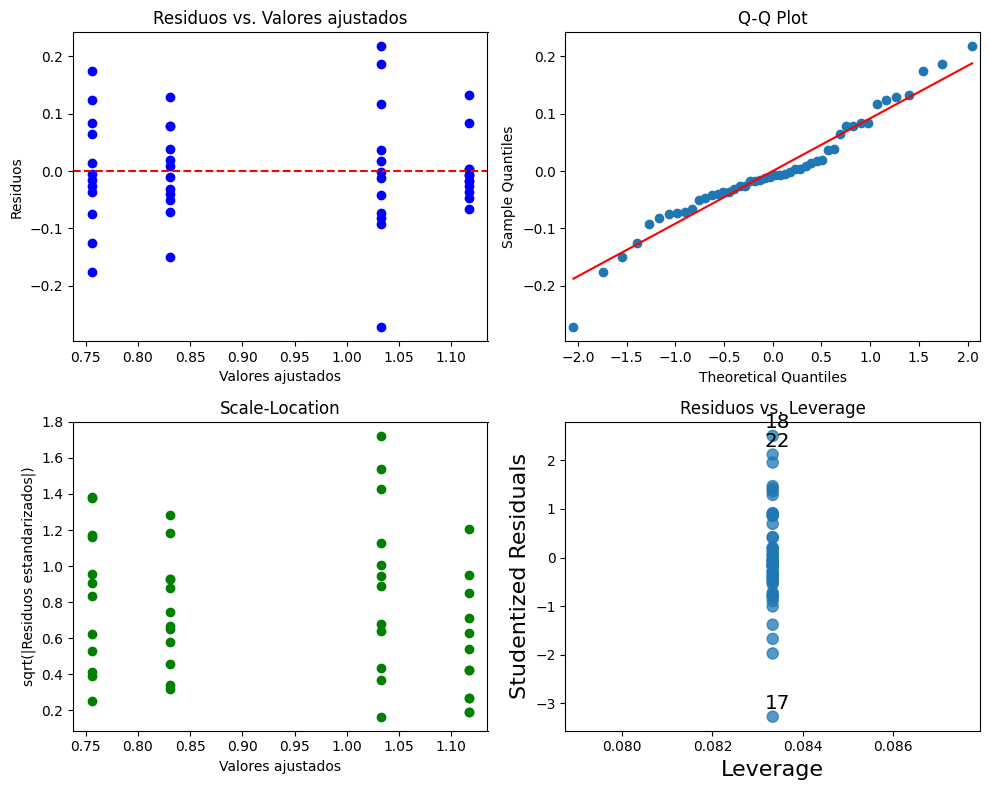

In [84]:
# 4. Gráficos diagnósticos (similar a plot(modelo2) en R)
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
# a) Residuos vs. Valores ajustados
axes[0, 0].scatter(modelo.fittedvalues, residuos, color='blue')
axes[0, 0].axhline(0, color='red', linestyle="--")
axes[0, 0].set_xlabel("Valores ajustados")
axes[0, 0].set_ylabel("Residuos")
axes[0, 0].set_title("Residuos vs. Valores ajustados")
# b) Q-Q Plot para evaluar normalidad
sm.qqplot(residuos, line='s', ax=axes[0, 1])
axes[0, 1].set_title("Q-Q Plot")
# c) Gráfico Scale-Location: raíz del valor absoluto de los residuos estandarizados vs. valores ajustados
influence = modelo.get_influence()
std_resid = influence.resid_studentized_internal
sqrt_abs_std_resid = np.sqrt(np.abs(std_resid))
axes[1, 0].scatter(modelo.fittedvalues, sqrt_abs_std_resid, color='green')
axes[1, 0].set_xlabel("Valores ajustados")
axes[1, 0].set_ylabel("sqrt(|Residuos estandarizados|)")
axes[1, 0].set_title("Scale-Location")
# d) Residuos vs. Leverage (para detectar puntos influyentes)
# d) Residuos vs. Leverage (para detectar puntos influyentes)
influence_plot(modelo, ax=axes[1, 1], size=8)
axes[1, 1].set_title("Residuos vs. Leverage")


plt.tight_layout()
plt.show()


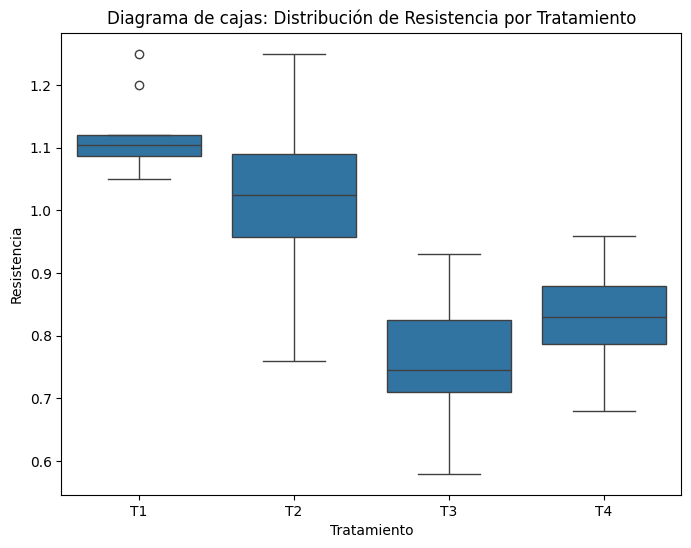

In [85]:
# Diagrama de cajas para visualizar la distribución de la Resistencia según el Tratamiento
plt.figure(figsize=(8, 6))
sns.boxplot(x='Tratamiento', y='Factor', data=df)
plt.title("Diagrama de cajas: Distribución de Resistencia por Tratamiento")
plt.xlabel("Tratamiento")
plt.ylabel("Resistencia")
plt.show()

  Tratamiento    Factor
0          T1  1.116667
1          T2  1.032500
2          T3  0.755833
3          T4  0.830833


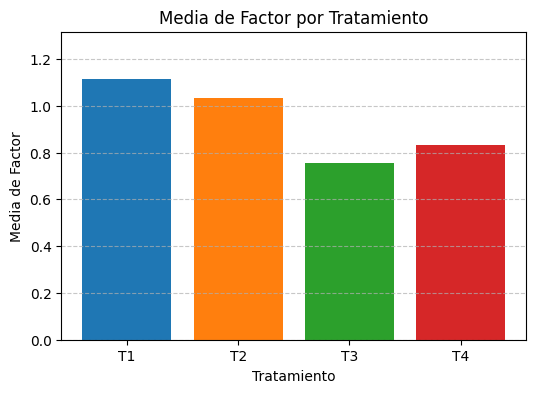

In [98]:
# Calcular medias por tratamiento
medias = df.groupby('Tratamiento')['Factor'].mean().reset_index()

# Mostrar tabla con medias
print(medias)

# Graficar barras con colores diferentes
plt.figure(figsize=(6,4))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # 4 colores distintos

plt.bar(medias['Tratamiento'], medias['Factor'], color=colors)
plt.title('Media de Factor por Tratamiento')
plt.xlabel('Tratamiento')
plt.ylabel('Media de Factor')
plt.ylim(0, medias['Factor'].max() + 0.2)  # margen superior para que se vea mejor
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

\footnotesize

##  Interpretación de los Gráficos Diagnósticos del ANOVA

- **Residuos vs. Valores Ajustados**:  
  Evalúa la linealidad y homocedasticidad. Una distribución aleatoria de puntos alrededor de la línea horizontal ($y = 0$) indica que los errores son independientes y tienen varianza constante. La presencia de patrones sugiere no linealidad o heterocedasticidad.

- **Q-Q Plot (Quantile-Quantile Plot)**:  
  Compara la distribución de los residuos con una normal teórica. Si los puntos se alinean sobre la línea diagonal, se asume normalidad. Desviaciones sistemáticas indican que los residuos no son normales.

- **Scale-Location (raíz de residuos estandarizados vs. valores ajustados)**:  
  Evalúa si la varianza de los residuos es constante. Una dispersión horizontal homogénea indica homocedasticidad. Un patrón de embudo sugiere heterocedasticidad.

- **Residuos vs. Leverage (gráfico de influencia)**:  
  Identifica observaciones influyentes. Puntos con alto leverage y grandes residuos pueden afectar el modelo significativamente. Las líneas de distancia de Cook ayudan a detectar observaciones problemáticas.

- **Histograma de residuos**:  
  Permite observar la forma de la distribución de los errores. Si los residuos siguen una distribución normal, el histograma debe mostrar una forma de campana (curva gaussiana). Asimetrías o picos inusuales pueden indicar violación del supuesto de normalidad.

- **Boxplot general de residuos**:  
  Permite identificar valores atípicos (outliers) entre los residuos. Si los residuos están centrados en cero y dentro del rango intercuartílico sin demasiados puntos extremos, se refuerza la validez de los supuestos. Presencia de outliers podría indicar observaciones anómalas que afectan el modelo.


Paso 6: Verificar los supuestos del modelo

6.1.1 Prueba de normalidad: Shapiro-Wilk sobre los residuales (datos<50)

In [86]:
# Normalidad de los residuos
shapiro_result = shapiro(residuos)
print("\nResultado de la prueba de Shapiro-Wilk:")
print(f"W = {shapiro_result.statistic:.4f}, p-value = {shapiro_result.pvalue:.4f}")
# --- Conclusión para Shapiro-Wilk:
if shapiro_result.pvalue > 0.05:
    print("\n[Conclusión Shapiro-Wilk]: Se acepta H0 , los residuales o errores se ajustan una distribución normal (p > 0.05).")
else:
    print("\n[Conclusión Shapiro-Wilk]: Se rechaza H0 , los residuales o errores no se ajustan  una distribución normal (p < 0.05).")


Resultado de la prueba de Shapiro-Wilk:
W = 0.9674, p-value = 0.2005

[Conclusión Shapiro-Wilk]: Se acepta H0 , los residuales o errores se ajustan una distribución normal (p > 0.05).


6.1.2 Prueba de Kolmogorov-Smirnov (K-S) sobre los residuales (datos>50)

In [87]:
# Prueba de Kolmogorov-Smirnov para normalidad de los residuos
ks_statistic, ks_p_value = kstest(residuos, 'norm', args=(residuos.mean(), residuos.std()))

print("\nPrueba Kolmogorov-Smirnov:")
print(f'Estadístico K-S: {ks_statistic}')
print(f'P-valor: {ks_p_value}')

# Interpretación
if ks_p_value > 0.05:
    print("\n[Conclusión K-S]: Se acepta H0 , los residuales o errores se ajustan una distribución normal (p > 0.05).")
else:
     print("\n[Conclusión K-S]: Se rechaza H0 , los residuales o errores no se ajustan  una distribución normal (p < 0.05).")


Prueba Kolmogorov-Smirnov:
Estadístico K-S: 0.1265506451441113
P-valor: 0.39277391606376777

[Conclusión K-S]: Se acepta H0 , los residuales o errores se ajustan una distribución normal (p > 0.05).


6.2 Prueba de homogeneidad de varianzas (Levene)

In [88]:
#Homogeneidad de varianzas (Levene)
# Se separan los datos por grupo (tratamiento)
lista_grupos = [df.loc[df["Tratamiento"] == trat, "Factor"] 
                for trat in df["Tratamiento"].unique()]

levene_median = levene(*lista_grupos, center='median')
levene_mean   = levene(*lista_grupos, center='mean')
print("\nResultado de la prueba de Levene (centro = mediana):")
print(levene_median)
print("\nResultado de la prueba de Levene (centro = media):")
print(levene_mean)
## --- Conclusión para Levene:
if levene_mean.pvalue > 0.05 and levene_median.pvalue > 0.05:
    print("\n[Conclusión Levene]: Se acepta la homogeneidad de varianzas entre los grupos (p > 0.05).")
else:
    print("\n[Conclusión Levene]: No se cumple la homogeneidad de varianzas (p < 0.05).")



Resultado de la prueba de Levene (centro = mediana):
LeveneResult(statistic=np.float64(2.029613561500764), pvalue=np.float64(0.12355189740221557))

Resultado de la prueba de Levene (centro = media):
LeveneResult(statistic=np.float64(2.032254099783372), pvalue=np.float64(0.1231753299361144))

[Conclusión Levene]: Se acepta la homogeneidad de varianzas entre los grupos (p > 0.05).


6.3 Prueba de independencia: estadístico de Durbin-Watson

In [89]:
dw = durbin_watson(residuos)
print("\nEstadístico de Durbin-Watson:")
print(dw)
# --- Conclusión Durbin-Watson:
if 1.5 <= dw <= 2.5:
    print("\n[Conclusión Durbin-Watson]: No se detecta correlacion serial positiva o negativa en los residuales (valor cercano a 2).")
    print("se tiene evidencia estadisica para afirmar que hay independicia entre los residuos a un nivel significancia del 5%.")
else:
    print("\n[Conclusión Durbin-Watson]: Hay evidencia estadisticamente significativa  de posibles indicios de autocorrelación en los residuales.")


Estadístico de Durbin-Watson:
2.290160601260398

[Conclusión Durbin-Watson]: No se detecta correlacion serial positiva o negativa en los residuales (valor cercano a 2).
se tiene evidencia estadisica para afirmar que hay independicia entre los residuos a un nivel significancia del 5%.


Paso 7 : Confrimacion de la tabla ANOVA e interpretación

Dado se que cumplen los supuestos de un DCA entonces podemos aplicar ANOVA

In [90]:
# 8. Confirmación de la tabla ANOVA
print("\nTabla ANOVA (confirmación):")
print(anova_table)


Tabla ANOVA (confirmación):
                  sum_sq    df          F        PR(>F)
C(Tratamiento)  1.025473   3.0  37.129592  4.046506e-12
Residual        0.405075  44.0        NaN           NaN


In [91]:
# Acceder al p-valor usando iloc para evitar la advertencia
F_tab = anova_table['PR(>F)'].iloc[0] 
valor_F = anova_table.loc['C(Tratamiento)', 'F']
alpha = 0.05  # Nivel de significancia

print(f"F-calculado: {valor_F:.2f}")
print(f"F-tabular {F_tab:.5e}")


if valor_F > F_tab:
    print(f"F-calculado ({valor_F:.5e}) es mayor que el F-tabular  ({F_tab}), se RECHAZA la hipótesis nula (H₀).")
    print(f"Hay suficiente evidencia estadística para afirmar que el factor '{experimento['factor']}' \n afecta significativamente la variable '{experimento['variable_respuesta']}'.")
    print("Esto indica que al menos uno de los tratamientos es significativamente diferente de los demás.")
    print("Se recomienda proceder con comparaciones post-hoc para identificar qué tratamientos son significativamente diferentes entre sí.")
else:
    print(f"F-calculado ({valor_F:.5e}) es menor o igual que el F_tabular ({F_tab}), NO se rechaza la hipótesis nula (H₀).")
    print(f"Hay suficiente evidencia estadística para afirmar que el factor '{experimento['factor']}'  \n no tiene un efecto significativo sobre '{experimento['variable_respuesta']}'.")
    print("No se recomienda proceder con comparaciones post-hoc, ya que no se encontró evidencia suficiente para justificar que los tratamientos difieren significativamente.")


F-calculado: 37.13
F-tabular 4.04651e-12
F-calculado (3.71296e+01) es mayor que el F-tabular  (4.046505959536516e-12), se RECHAZA la hipótesis nula (H₀).
Hay suficiente evidencia estadística para afirmar que el factor 'Crecimeinto de la planta' 
 afecta significativamente la variable 'Tamaño en Metros'.
Esto indica que al menos uno de los tratamientos es significativamente diferente de los demás.
Se recomienda proceder con comparaciones post-hoc para identificar qué tratamientos son significativamente diferentes entre sí.


Paso 8 : Comparaciones múltiples de medias

8.1 Prueba de Diferencia Mínima Significativa (LSD) de Fisher:

In [92]:
# Realizar la prueba LSD (usando TukeyHSD como aproximación)
print("\n" + "="*60)
print("PRUEBA DE DIFERENCIA MÍNIMA SIGNIFICATIVA (LSD)")
print("="*60 + "\n")

print("{:<10} {:<10} {:<12} {:<10} {:<8} {:<15}".format(
    "Grupo 1", "Grupo 2", "Diferencia", "p-valor", "¿Sig?", "Conclusión"))
print("-"*65)

# Calcular manualmente las comparaciones LSD
from scipy.stats import ttest_ind

tratamientos = df['Tratamiento'].unique()
for i in range(len(tratamientos)):
    for j in range(i+1, len(tratamientos)):
        grupo1 = tratamientos[i]
        grupo2 = tratamientos[j]
        
        data1 = df[df['Tratamiento'] == grupo1]['Factor']
        data2 = df[df['Tratamiento'] == grupo2]['Factor']
        
        # Prueba t independiente (equivalente a LSD)
        t_stat, p_value = ttest_ind(data1, data2)
        meandiff = np.mean(data1) - np.mean(data2)
        
        # Determinar significancia y dirección
        if p_value < 0.05:
            significancia = "Sí"
            if meandiff > 0:
                conclusion = f"'{grupo1}' > '{grupo2}' (p={p_value:.4f})"
            else:
                conclusion = f"'{grupo1}' < '{grupo2}' (p={p_value:.4f})"
        else:
            significancia = "No"
            conclusion = f"Sin diferencia significativa (p={p_value:.4f})"
        
        # Imprimir fila formateada
        print("{:<10} {:<10} {:<12.4f} {:<10.4f} {:<8} {:<15}".format(
            grupo1, grupo2, meandiff, p_value, significancia, conclusion))

# Información adicional
print("\n" + "="*60)
print("Notas metodológicas:")
print(f"- Nivel de significancia: α = 0.05")
print("- Prueba basada en t-test independiente (equivalente a LSD)")
print("- Valores p no ajustados para comparaciones múltiples")
print("="*60)




PRUEBA DE DIFERENCIA MÍNIMA SIGNIFICATIVA (LSD)

Grupo 1    Grupo 2    Diferencia   p-valor    ¿Sig?    Conclusión     
-----------------------------------------------------------------
T1         T2         0.0842       0.0556     No       Sin diferencia significativa (p=0.0556)
T1         T3         0.3608       0.0000     Sí       'T1' > 'T3' (p=0.0000)
T1         T4         0.2858       0.0000     Sí       'T1' > 'T4' (p=0.0000)
T2         T3         0.2767       0.0000     Sí       'T2' > 'T3' (p=0.0000)
T2         T4         0.2017       0.0002     Sí       'T2' > 'T4' (p=0.0002)
T3         T4         -0.0750      0.0522     No       Sin diferencia significativa (p=0.0522)

Notas metodológicas:
- Nivel de significancia: α = 0.05
- Prueba basada en t-test independiente (equivalente a LSD)
- Valores p no ajustados para comparaciones múltiples


8.2 Prueba de Tukey para comparaciones múltiples

In [93]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import pandas as pd
import numpy as np

# Asumo que ya tienes tu DataFrame df con columnas 'Factor' y 'Tratamiento'

print("\n" + "═"*50)
print(" PRUEBA DE COMPARACIÓN MÚLTIPLE DE TUKEY ")
print("═"*50)
tukey = pairwise_tukeyhsd(endog=df["Factor"],
                         groups=df["Tratamiento"],
                         alpha=0.05)

# 1. Mostrar el resumen estadístico completo
print(tukey.summary())

print("\n" + "═"*50)
print(" MEDIAS POR TRATAMIENTO Y GRUPOS HOMOGÉNEOS ")
print("═"*50)

# Calcular medias por tratamiento
medias = df.groupby('Tratamiento')['Factor'].mean().sort_values(ascending=False)

# Crear DataFrame con las medias
resultados = pd.DataFrame({'Media': medias})

# Asignar letras de grupos homogéneos manualmente basado en el resumen de Tukey
letras_grupos = {
    'T1': 'a',
    'T2': 'a', 
    'T4': 'b',
    'T3': 'b'
}

resultados['Grupo'] = resultados.index.map(letras_grupos)

# Mostrar resultados ordenados
print(resultados.reset_index().to_string(index=False))

print("\n" + "═"*50)
print(" INTERPRETACIÓN ")
print("═"*50)

# Obtener el tratamiento con la media más alta (sin warning)
mejor_tratamiento = resultados['Media'].idxmax()

print(f"El mejor tratamiento es {mejor_tratamiento} con media {resultados.loc[mejor_tratamiento, 'Media']:.4f}")
print("\nTratamientos con la misma letra no son significativamente diferentes")
print("(α = 0.05)\n")
print("Revisar el resumen de Tukey para ver las comparaciones específicas")



══════════════════════════════════════════════════
 PRUEBA DE COMPARACIÓN MÚLTIPLE DE TUKEY 
══════════════════════════════════════════════════
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
    T1     T2  -0.0842 0.1539 -0.1888  0.0204  False
    T1     T3  -0.3608    0.0 -0.4654 -0.2562   True
    T1     T4  -0.2858    0.0 -0.3904 -0.1812   True
    T2     T3  -0.2767    0.0 -0.3813 -0.1721   True
    T2     T4  -0.2017    0.0 -0.3063 -0.0971   True
    T3     T4    0.075 0.2368 -0.0296  0.1796  False
----------------------------------------------------

══════════════════════════════════════════════════
 MEDIAS POR TRATAMIENTO Y GRUPOS HOMOGÉNEOS 
══════════════════════════════════════════════════
Tratamiento    Media Grupo
         T1 1.116667     a
         T2 1.032500     a
         T4 0.830833     b
         T3 0.755833     b

═════════════════════════════════════════

8.3 Prueba de Scheffé

In [94]:
# ==============================================
# ANÁLISIS ESTADÍSTICO - PRUEBA DE SCHEFFÉ
# ==============================================

print("\n" + "="*70)
print("ANÁLISIS POST-HOC: PRUEBA DE SCHEFFÉ")
print("="*70 + "\n")

# 1. Modelo ANOVA
print("➤ Paso 1: Análisis de Varianza (ANOVA)")
modelo = ols('Factor ~ Tratamiento', data=df).fit()
anova_resultado = anova_lm(modelo)
print(anova_resultado)

# 2. Cálculo de parámetros clave
MSE = anova_resultado['mean_sq']['Residual']
gl_tratamientos = anova_resultado['df']['Tratamiento']
gl_error = anova_resultado['df']['Residual']
n_grupo = len(df) // len(df['Tratamiento'].unique())

print(f"\n➤ Parámetros clave:")
print(f"- Grados libertad tratamientos: {gl_tratamientos}")
print(f"- Grados libertad error: {gl_error}")
print(f"- Error Cuadrático Medio (MSE): {MSE:.4f}")
print(f"- Tamaño de grupo (n): {n_grupo}")

# 3. Valor crítico de Scheffé
f_critico = f.ppf(0.95, gl_tratamientos, gl_error)
print(f"\n➤ Valor F crítico (α=0.05): {f_critico:.4f}")

# 4. Comparaciones por pares
medias = df.groupby("Tratamiento")["Factor"].mean()
comparaciones = []

print("\n" + "="*70)
print("COMPARACIONES POR PARES")
print("="*70)
print("{:<12} {:<12} {:<15} {:<12} {:<10} {:<20} {:<10}".format(
    "Trat.A", "Trat.B", "Diferencia", "F-Scheffé", "p-valor", "Conclusión", "Dirección"))
print("-"*90)

for i in range(len(medias)):
    for j in range(i+1, len(medias)):
        grupoA = medias.index[i]
        grupoB = medias.index[j]
        diff = medias.iloc[i] - medias.iloc[j]
        
        # Cálculo del estadístico F de Scheffé
        F_scheffe = (diff**2) / (MSE * (1/n_grupo + 1/n_grupo) * gl_tratamientos)
        p_value = 1 - f.cdf(F_scheffe, gl_tratamientos, gl_error)
        
        # Determinación de significancia
        if p_value < 0.05:
            sig = "SÍ"
            concl = "Diferencia significativa"
        else:
            sig = "NO"
            concl = "Sin diferencia significativa"
        
        # Dirección del efecto
        direccion = "A > B" if diff > 0 else "A < B"
        
        # Almacenar resultados
        comparaciones.append({
            'Grupo A': grupoA,
            'Grupo B': grupoB,
            'Diferencia': abs(diff),
            'F-Scheffé': F_scheffe,
            'p-valor': p_value,
            'Significativo': sig,
            'Dirección': direccion
        })
        
        # Imprimir fila formateada
        print("{:<12} {:<12} {:<15.4f} {:<12.4f} {:<10.4f} {:<20} {:<10}".format(
            grupoA, grupoB, abs(diff), F_scheffe, p_value, concl, direccion))

# 5. Resumen estadístico
print("\n" + "="*70)
print("RESUMEN ESTADÍSTICO")
print("="*70)
print(f"➤ Comparaciones significativas: {sum(1 for c in comparaciones if c['Significativo'] == 'SÍ')}/{len(comparaciones)}")
print(f"➤ Valor F crítico: {f_critico:.4f}")
print(f"➤ Nivel de significancia: α = 0.05")

# 6. Exportar resultados
resultados_df = pd.DataFrame(comparaciones)
print("\nResultados completos:")
print(resultados_df.to_string(index=False))



ANÁLISIS POST-HOC: PRUEBA DE SCHEFFÉ

➤ Paso 1: Análisis de Varianza (ANOVA)
               df    sum_sq   mean_sq          F        PR(>F)
Tratamiento   3.0  1.025473  0.341824  37.129592  4.046506e-12
Residual     44.0  0.405075  0.009206        NaN           NaN

➤ Parámetros clave:
- Grados libertad tratamientos: 3.0
- Grados libertad error: 44.0
- Error Cuadrático Medio (MSE): 0.0092
- Tamaño de grupo (n): 12

➤ Valor F crítico (α=0.05): 2.8165

COMPARACIONES POR PARES
Trat.A       Trat.B       Diferencia      F-Scheffé    p-valor    Conclusión           Dirección 
------------------------------------------------------------------------------------------
T1           T2           0.0842          1.5390       0.2178     Sin diferencia significativa A > B     
T1           T3           0.3608          28.2853      0.0000     Diferencia significativa A > B     
T1           T4           0.2858          17.7490      0.0000     Diferencia significativa A > B     
T2           T3      

8.4 Prueba de Duncan

In [95]:
# ==============================================
# ANÁLISIS ESTADÍSTICO - PRUEBA DE DUNCAN
# ==============================================

print("\n" + "="*70)
print("ANÁLISIS POST-HOC: PRUEBA DE DUNCAN")
print("="*70 + "\n")

# 1. Calcular parámetros básicos
n_groups = len(df['Tratamiento'].unique())
group_means = df.groupby('Tratamiento')['Factor'].mean().sort_values(ascending=False)
n_obs = len(df) / n_groups
MSE = 0.0092  # Valor del ANOVA anterior
df_error = 44  # Grados de libertad del error

print("➤ Medias de tratamientos ordenadas:")
print(group_means.to_string())

# 2. Calcular rangos significativos
print("\n➤ Rangos significativos de Duncan:")
alpha = 0.05
ranges = {}

for p in range(2, n_groups + 1):
    q = qsturng(1 - alpha, p, df_error)
    sr = q * np.sqrt(MSE / n_obs)
    ranges[p] = sr
    print(f"p={p}: Rango crítico = {sr:.4f}")

# 3. Realizar comparaciones
print("\n" + "="*70)
print("COMPARACIONES POR PARES")
print("="*70)
print("{:<12} {:<12} {:<15} {:<12} {:<10} {:<20}".format(
    "Tratamiento", "Comparado con", "Diferencia", "Rango crítico", "Signif.", "Conclusión"))
print("-"*85)

results = []
groups = group_means.index.tolist()

for i in range(len(groups)):
    for j in range(i + 1, len(groups)):
        group1 = groups[i]
        group2 = groups[j]
        diff = group_means[group1] - group_means[group2]
        p = j - i + 1  # Número de pasos entre medias
        critical = ranges[p]
        
        if diff > critical:
            sig = "SÍ"
            concl = f"Diferencia significativa (p={p})"
        else:
            sig = "NO"
            concl = "No significativa"
        
        results.append({
            'Grupo Superior': group1,
            'Grupo Inferior': group2,
            'Diferencia': diff,
            'Rango crítico': critical,
            'p (pasos)': p,
            'Significativo': sig
        })
        
        print("{:<12} {:<12} {:<15.4f} {:<12.4f} {:<10} {:<20}".format(
            group1, group2, diff, critical, sig, concl))

# 4. Resumen estadístico
print("\n" + "="*70)
print("RESUMEN ESTADÍSTICO")
print("="*70)
print(f"➤ Nivel de significancia: α = {alpha}")
print(f"➤ Error Cuadrático Medio (MSE): {MSE:.4f}")
print(f"➤ Grados de libertad del error: {df_error}")
print(f"➤ Número de observaciones por grupo: {n_obs:.0f}")

# 5. Resultados en DataFrame
results_df = pd.DataFrame(results)
print("\nResultados completos:")
print(results_df.to_string(index=False))



ANÁLISIS POST-HOC: PRUEBA DE DUNCAN

➤ Medias de tratamientos ordenadas:
Tratamiento
T1    1.116667
T2    1.032500
T4    0.830833
T3    0.755833

➤ Rangos significativos de Duncan:
p=2: Rango crítico = 0.0789
p=3: Rango crítico = 0.0950
p=4: Rango crítico = 0.1046

COMPARACIONES POR PARES
Tratamiento  Comparado con Diferencia      Rango crítico Signif.    Conclusión          
-------------------------------------------------------------------------------------
T1           T2           0.0842          0.0789       SÍ         Diferencia significativa (p=2)
T1           T4           0.2858          0.0950       SÍ         Diferencia significativa (p=3)
T1           T3           0.3608          0.1046       SÍ         Diferencia significativa (p=4)
T2           T4           0.2017          0.0789       SÍ         Diferencia significativa (p=2)
T2           T3           0.2767          0.0950       SÍ         Diferencia significativa (p=3)
T4           T3           0.0750          0.0789 

In [96]:
import pandas as pd 
import statsmodels.api as sm
from statsmodels.formula.api import ols

# 1. Crear DataFrame con los datos
# Datos del ejemplo (tratamiento vs resistencia)
df = pd.DataFrame({
    'Tratamiento': ['T1']*12 + ['T2']*12+ ['T3']*12 + ['T4']*12 ,
    'Factor': [1.10,1.11,1.05,1.12,1.25,1.20,1.07,1.08,1.09,1.10,1.11,1.12,1.02,1.15,0.96,0.99,0.94,0.76,1.25,1.07,0.95,1.05,1.22,1.03,0.93,0.72,0.68,0.75,0.63,0.88,0.82,0.77,0.58,0.74,0.84,0.73,0.84,0.80,0.68,0.96,0.76,0.91,0.91,0.82,0.78,0.85,0.79,0.87]
})
print(df.head())

# 2. Ajustar modelo ANOVA
modelo = ols('Factor~ C(Tratamiento)', data=df).fit()

# 3. Calcular y agrupar residuos por tratamiento
residuos_por_tratamiento = (
    df.assign(Residual=modelo.resid)
    .groupby('Tratamiento')['Residual']
    .agg(list)
    .to_dict()
)

# 4. Mostrar resultados de forma organizada
print("\n" + "═"*50)
print(" ERRORES (RESIDUALES) POR TRATAMIENTO ")
print("═"*50)

for tratamiento, residuos in residuos_por_tratamiento.items():
    print(f"\nTratamiento {tratamiento}:")
    print(pd.DataFrame({'Residual': residuos}).to_string(index=False, float_format="%.4f"))
    
# 5. Estadísticos descriptivos de los residuos
print("\n" + "═"*50)
print(" ESTADÍSTICOS DE LOS RESIDUALES ")
print("═"*50)
print(df.assign(Residual=modelo.resid).groupby('Tratamiento')['Residual'].describe())

  Tratamiento  Factor
0          T1    1.10
1          T1    1.11
2          T1    1.05
3          T1    1.12
4          T1    1.25

══════════════════════════════════════════════════
 ERRORES (RESIDUALES) POR TRATAMIENTO 
══════════════════════════════════════════════════

Tratamiento T1:
 Residual
  -0.0167
  -0.0067
  -0.0667
   0.0033
   0.1333
   0.0833
  -0.0467
  -0.0367
  -0.0267
  -0.0167
  -0.0067
   0.0033

Tratamiento T2:
 Residual
  -0.0125
   0.1175
  -0.0725
  -0.0425
  -0.0925
  -0.2725
   0.2175
   0.0375
  -0.0825
   0.0175
   0.1875
  -0.0025

Tratamiento T3:
 Residual
   0.1742
  -0.0358
  -0.0758
  -0.0058
  -0.1258
   0.1242
   0.0642
   0.0142
  -0.1758
  -0.0158
   0.0842
  -0.0258

Tratamiento T4:
 Residual
   0.0092
  -0.0308
  -0.1508
   0.1292
  -0.0708
   0.0792
   0.0792
  -0.0108
  -0.0508
   0.0192
  -0.0408
   0.0392

══════════════════════════════════════════════════
 ESTADÍSTICOS DE LOS RESIDUALES 
══════════════════════════════════════════════════
  